In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras==2.15.0

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
import os
import warnings
warnings.simplefilter('ignore')
import glob
from keras.layers import Input,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D,Dense
from keras.layers import AveragePooling2D,GlobalAveragePooling2D,MaxPooling2D,MaxPool2D,Dropout
from keras.models import Model,Sequential

In [ ]:
df = pd.read_csv('/content/fer2013.csv')
print(df.shape)

(1122, 3)


In [ ]:
file_path = '/content/fer2013.csv'


In [ ]:
df = pd.read_csv(file_path)



In [ ]:
df


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
1366,2,250 250 251 251 252 252 252 251 253 254 254 25...,Training
1367,2,3 5 8 6 3 7 10 16 25 31 34 34 38 48 59 65 74 8...,Training
1368,3,131 130 128 139 147 156 169 179 193 201 179 12...,Training
1369,5,201 201 199 200 199 201 144 103 85 52 60 150 1...,Training


In [ ]:
df.isnull().sum()

emotion    0
pixels     0
Usage      1
dtype: int64

<Axes: xlabel='emotion', ylabel='Usage'>

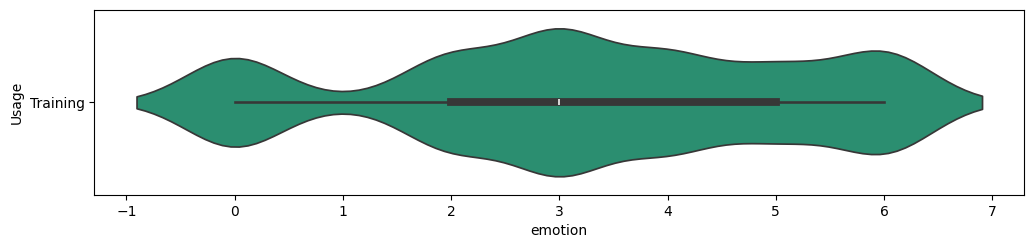

In [ ]:
figsize = (12, 1.2 * len(df['Usage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='emotion', y='Usage', inner='box', palette='Dark2')

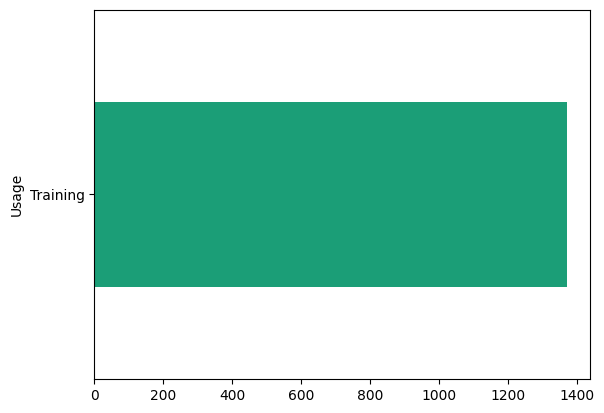

In [ ]:
df.groupby('Usage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.show()

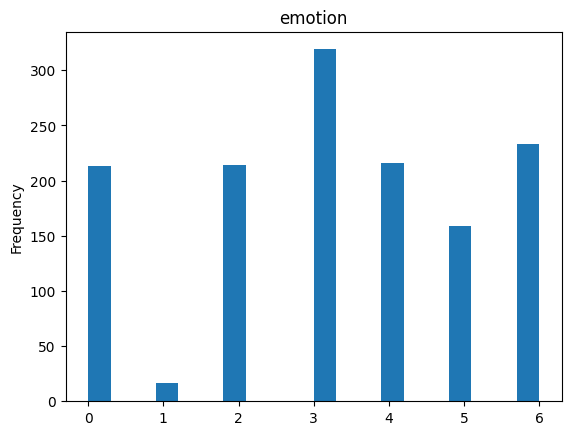

In [ ]:
df['emotion'].plot(kind='hist', bins=20, title='emotion')
plt.show()

In [ ]:
emotion_label= {0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}

In [ ]:
emotion_label

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

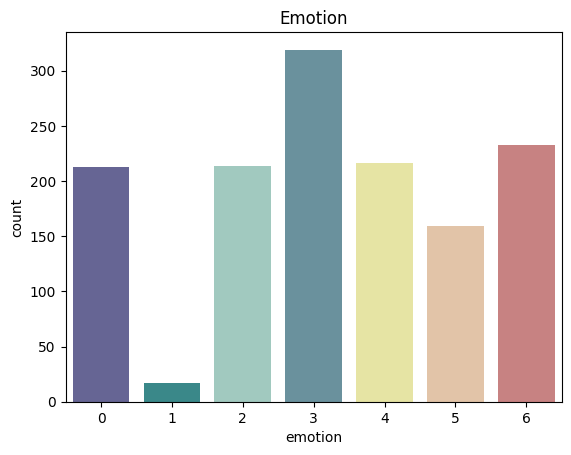

In [ ]:
sns.countplot(x='emotion',data=df,palette=('#5F5D9C','#2D9596','#9AD0C2','#6196A6','#F1EF99','#EBC49F','#D37676') )
plt.title ('Emotion')
plt.show()

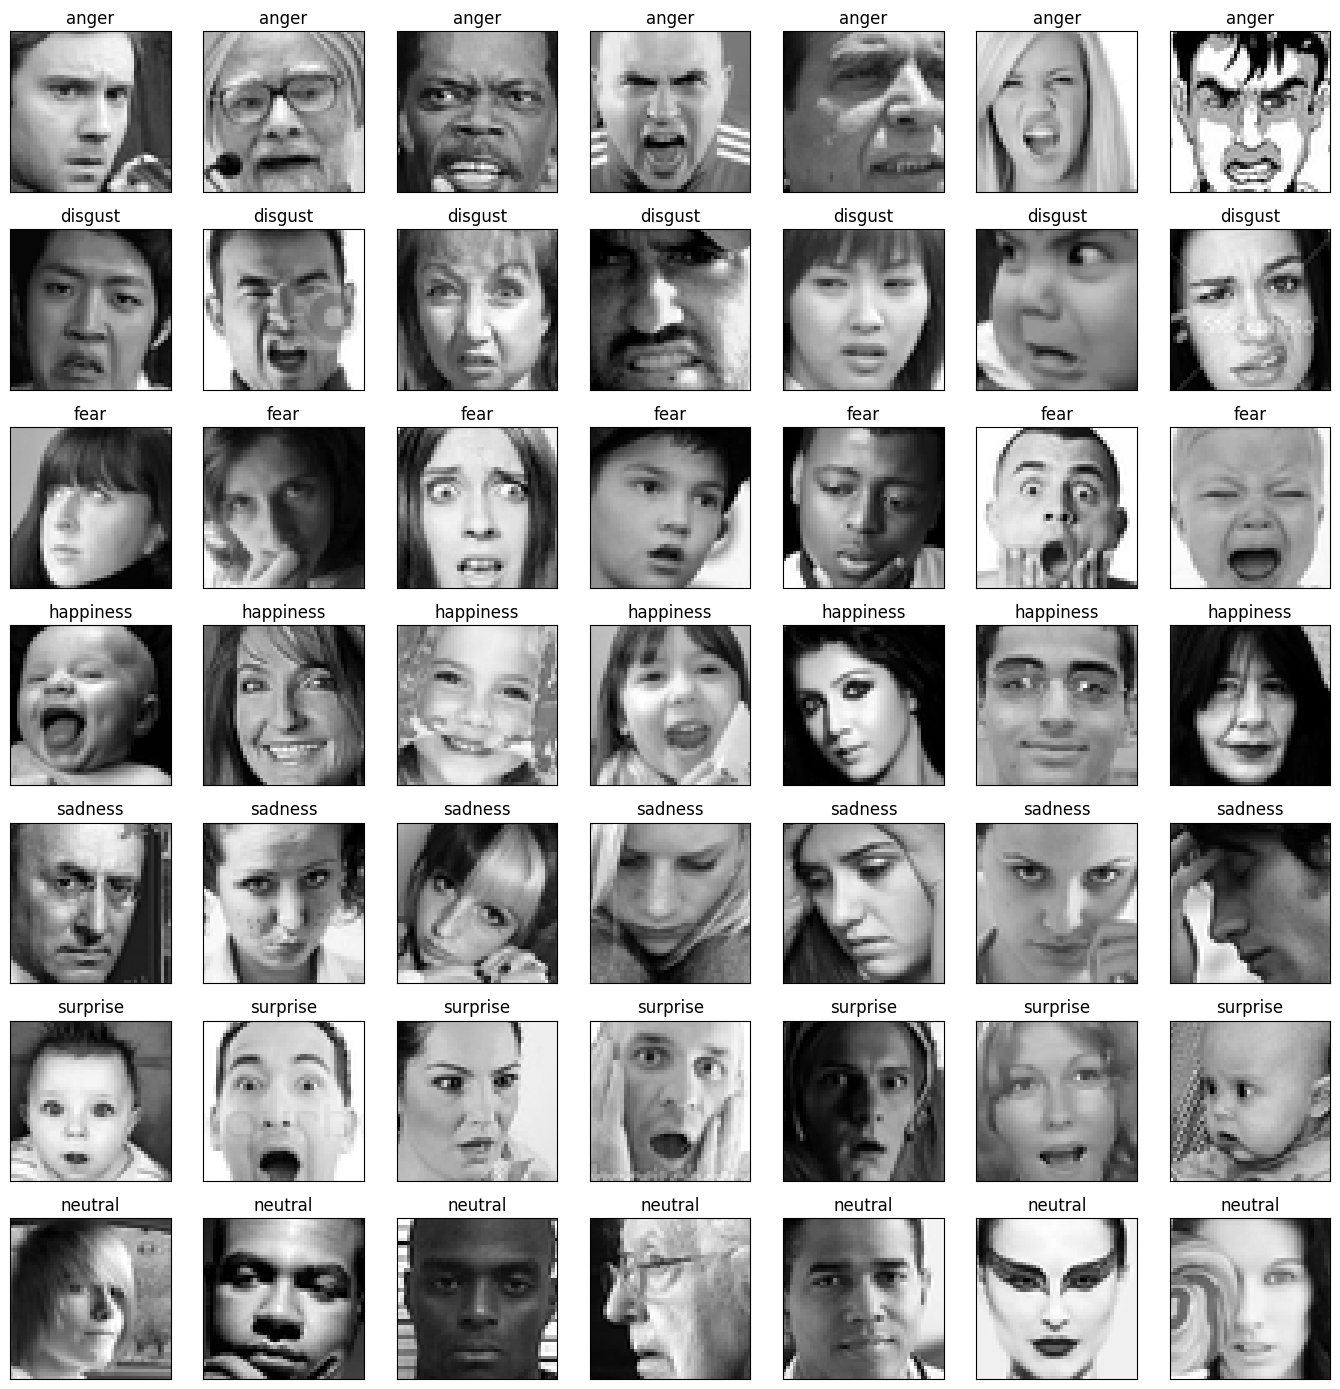

In [ ]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        if k < len(df[df.emotion==label].pixels):
            px = df[df.emotion==label].pixels.iloc[k]
        else:
            break  # Stop iterating if we reach the end of the series

        # reshaped to a 48x48 matrix and cast to float32.
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label [label])
        plt.tight_layout()

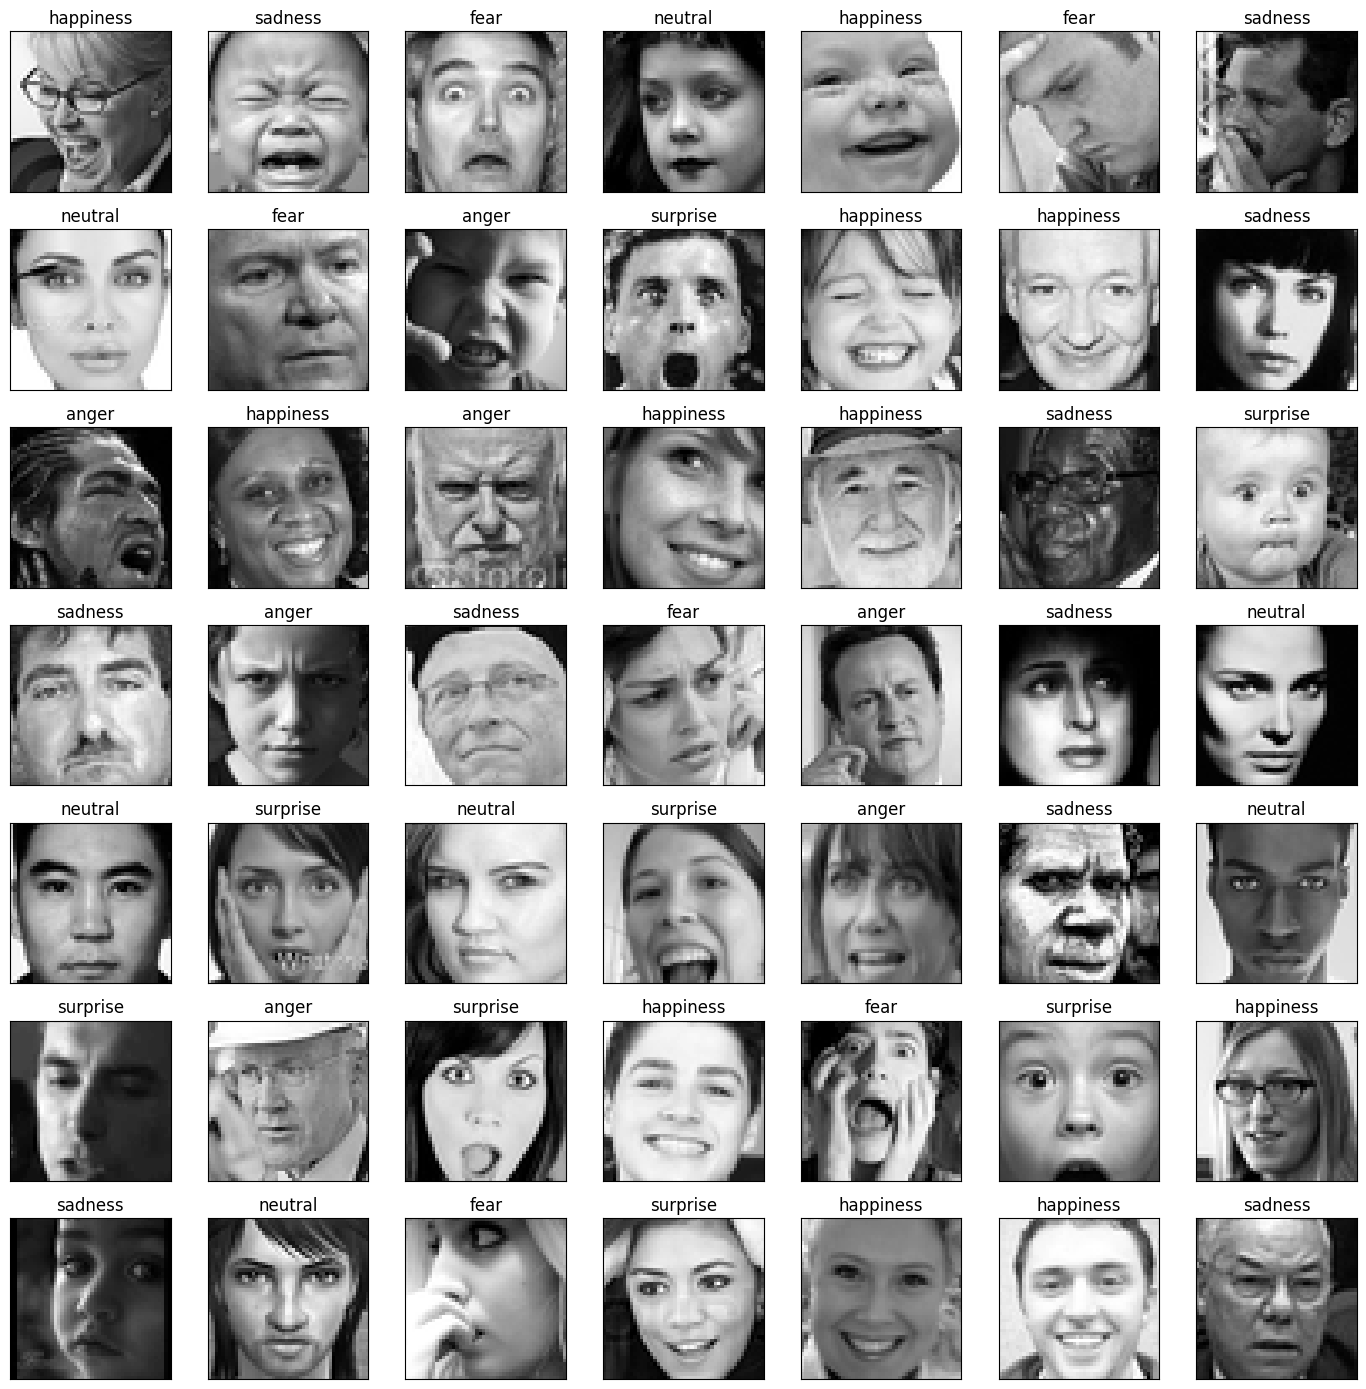

In [ ]:
import random

# Assuming df is your DataFrame containing the pixel values and emotion labels

fig = plt.figure(1, (14, 14))
num_rows, num_cols = 7, 7  # You can adjust the number of rows and columns as per your preference

# Shuffle the DataFrame indices randomly
random_indices = random.sample(range(len(df)), num_rows * num_cols)

for i, index in enumerate(random_indices):
    label = df.iloc[index]['emotion']
    px = np.array(df.iloc[index]['pixels'].split(' ')).reshape(48, 48).astype('float32')

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotion_label[label])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Preprocessing the data
def preprocess_data(df):
    X = []
    y = []
    for index, row in df.iterrows():
        pixels = np.array(row['pixels'].split(), dtype='float32')
        pixels = pixels.reshape(48, 48, 1) / 255.0  # normalize the pixels
        X.append(pixels)
        y.append(row['emotion'])
    X = np.array(X)
    y = keras.utils.to_categorical(y, num_classes=7)
    return X, y

# Split the data
train_df = df[df['Usage'] == 'Training']
val_df = df[df['Usage'] == 'PublicTest']
test_df = df[df['Usage'] == 'PrivateTest']

X_train, y_train = preprocess_data(train_df)
X_val, y_val = preprocess_data(val_df)
X_test, y_test = preprocess_data(test_df)

# Check shapes to ensure data is loaded correctly
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (1370, 48, 48, 1), y_train shape: (1370, 7)
X_val shape: (0,), y_val shape: (0, 7)
X_test shape: (0,), y_test shape: (0, 7)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (1370, 48, 48, 1)
y_train shape: (1370, 7)


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=0,batch_size=64)

In [ ]:
def predict_emotion(image_path, model):
    img = image.load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    emotion_label = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
    return emotion_label[np.argmax(prediction)]

# Example usage
image_path = '/content/smily.jpg'
emotion = predict_emotion(image_path, model)
print(f'The predicted emotion is: {emotion}')

1/1 [==============================] - 0s 124ms/step
The predicted emotion is: happiness


In [ ]:
pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=03f133ca2b6576fa3039cc503deed89801263f8f83e486a8ebc6e6cd9bc46988
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


{'emotion': {'angry': 15.811067271892266, 'disgust': 0.0031366025773971948, 'fear': 38.943623837448584, 'happy': 0.07058154280969756, 'sad': 42.833539416404925, 'surprise': 1.6625299178081703, 'neutral': 0.6755203876954549}, 'dominant_emotion': 'sad', 'region': {'x': 384, 'y': 149, 'w': 909, 'h': 909, 'left_eye': (989, 549), 'right_eye': (646, 482)}, 'face_confidence': 0.96}


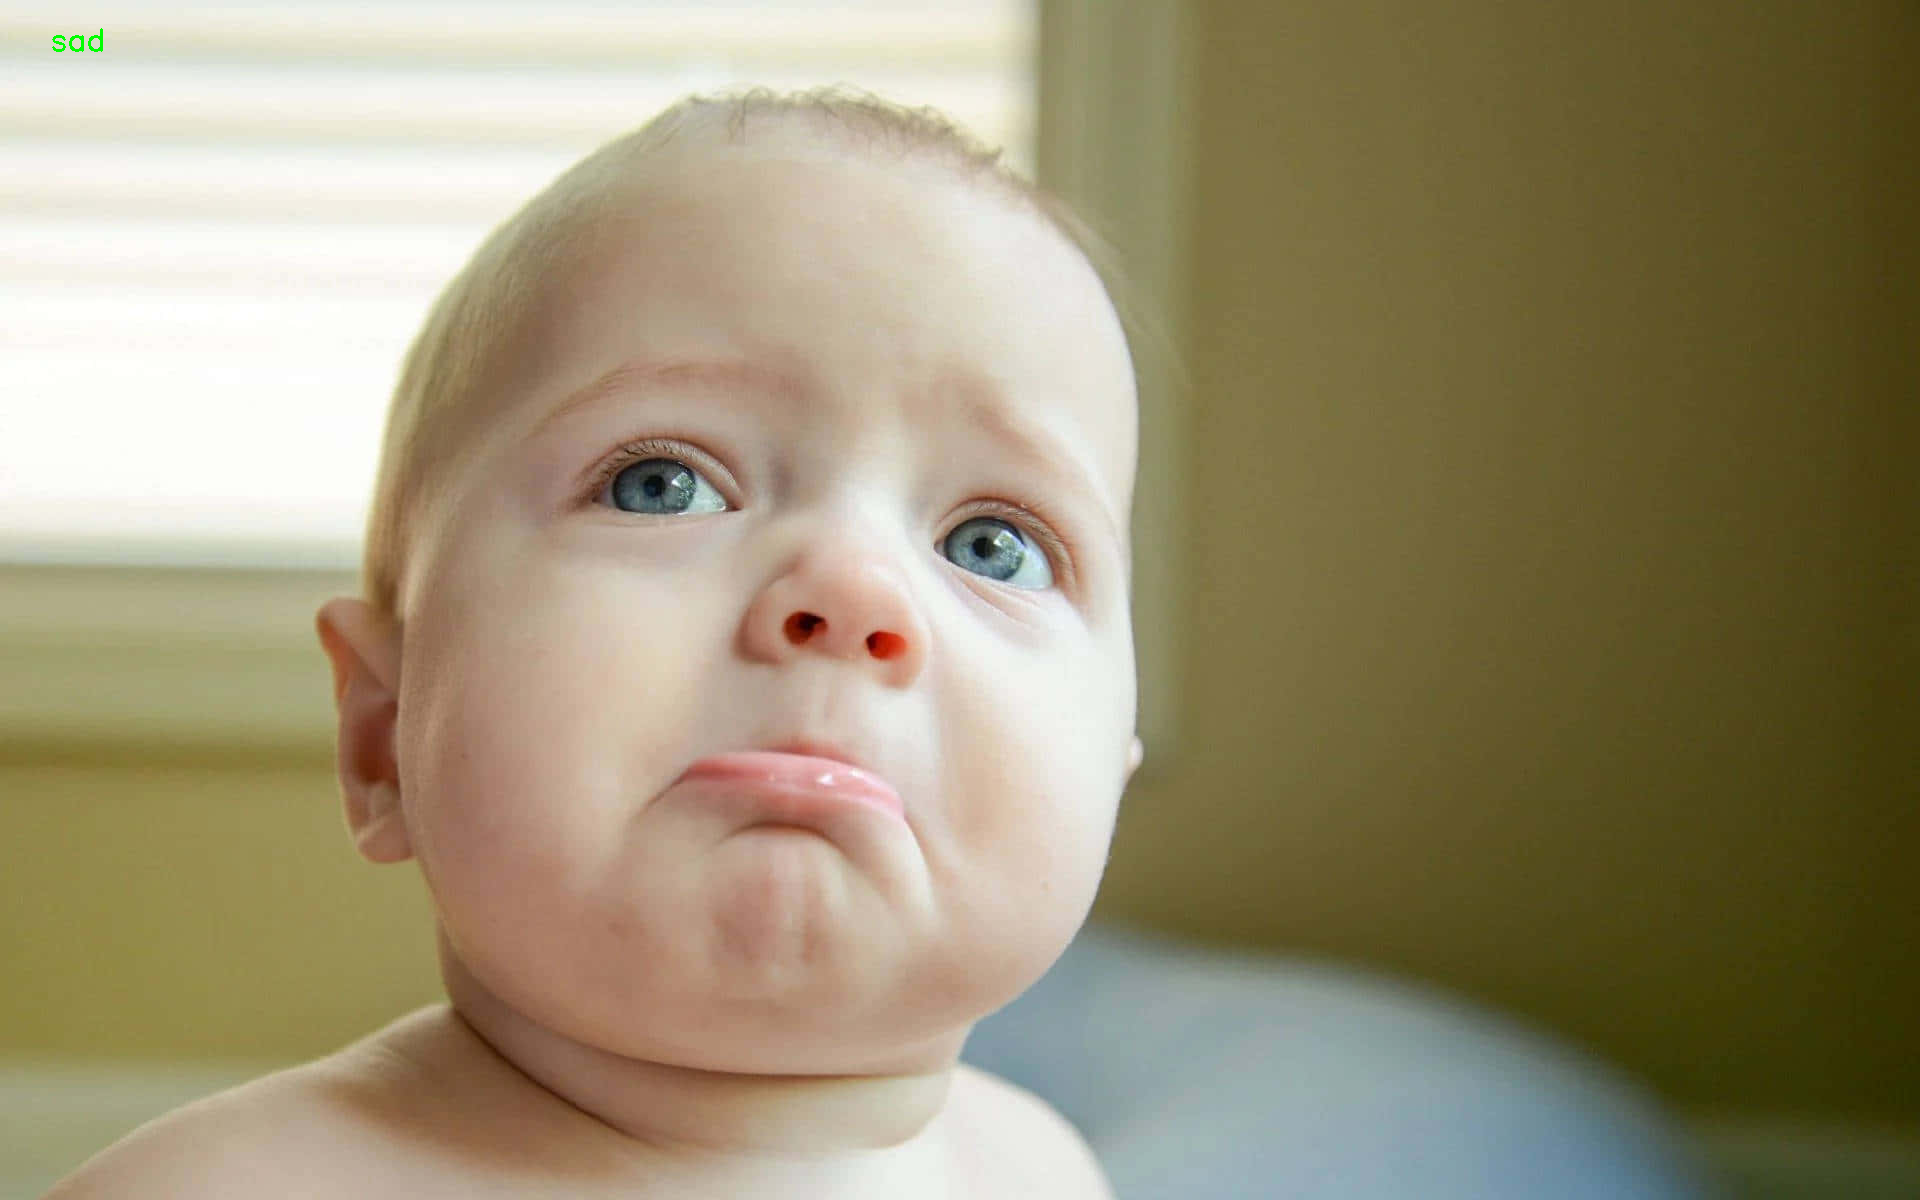

In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow

# Load an image using OpenCV
image_path = '/content/sad1.jpg'
image = cv2.imread(image_path)

# Analyze the image using DeepFace
result = DeepFace.analyze(img_path=image_path, actions=['emotion'])

# Since result is a list of dictionaries, we need to access the first element
emotion_data = result[0]  # Get the first dictionary in the list

# Print the results
print(emotion_data)

# Extract the dominant emotion
emotion = emotion_data['dominant_emotion']

# Display the image with the predicted emotion
cv2.putText(image, emotion, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(image)  # Use cv2_imshow() instead of cv2.imshow()
cv2.waitKey(0)
cv2.destroyAllWindows()